In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# # metadata 
# print(wine_quality.metadata) 
  
# # variable information 
# print(wine_quality.variables) 


In [3]:
X.head()  # Display the first few rows of the features dataframe

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
# importing libraries
from machinegnostics.metrics import gcorrelation
import pandas as pd
import numpy as np

/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [5]:
gcor = gcorrelation(X, y)

# printing the results
print("G-Correlation Results:")
display(gcor.sort_values(ascending=False, by = 'quality'))

G-Correlation Results:


,quality
chlorides,0.982795
free_sulfur_dioxide,0.982450
citric_acid,0.981344
residual_sugar,0.980924
sulphates,0.980540
density,0.980064
fixed_acidity,0.978046
volatile_acidity,0.976912
pH,0.973828
alcohol,0.970563


In [6]:
# train test split
from machinegnostics.models import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_seed=42)

/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and 

In [7]:
# importing machinegnostics regressor model
from machinegnostics.models import RobustRegressor

rr = RobustRegressor(degree=2, verbose=True, tol=1e-2)

rr.fit(X_train, y_train)

Iteration: 1 - Machine Gnostic loss - hi : 5196.999, rentropy: 6092219.3063
Iteration: 2 - Machine Gnostic loss - hi : 5197.0, rentropy: 2318059095.2022
Convergence reached at iteration 2 with loss/rentropy change below tolerance.


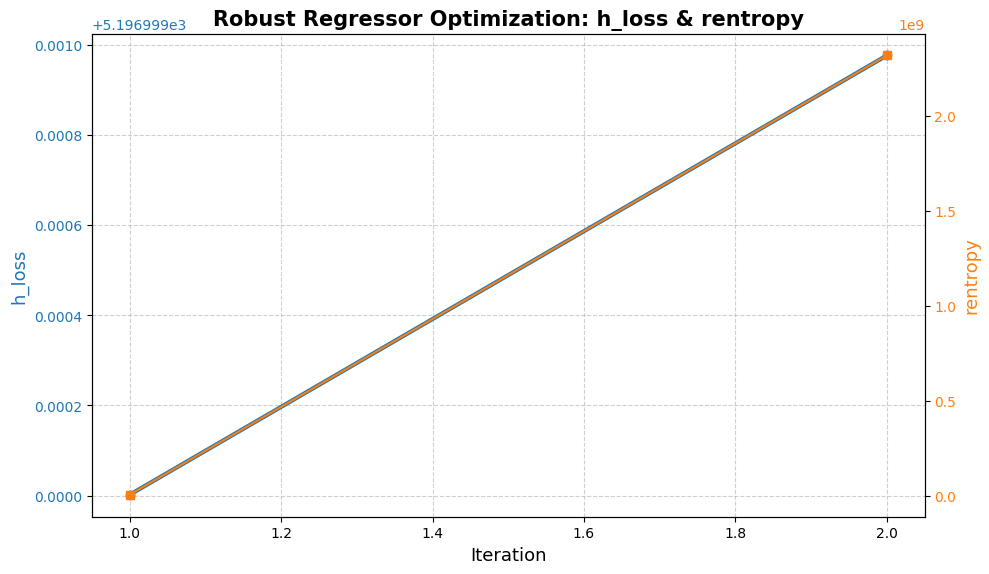

In [8]:
import matplotlib.pyplot as plt

# Extract history, skipping entries with None for 'h_loss'
history = [h for h in rr._history if h.get('h_loss') is not None]

# Extract values
h_loss = [h['h_loss'] for h in history]
rentropy = [h['rentropy'] for h in history]
iterations = range(1, len(history) + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Iteration', fontsize=13)
ax1.set_ylabel('h_loss', color=color1, fontsize=13)
ax1.plot(iterations, h_loss, color=color1, marker='o', linewidth=3, label='h_loss')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:orange'
ax2.set_ylabel('rentropy', color=color2, fontsize=13)
ax2.plot(iterations, rentropy, color=color2, marker='s', linewidth=1.5, label='rentropy')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Robust Regressor Optimization: h_loss & rentropy', fontsize=15, fontweight='bold')
fig.tight_layout()
plt.show()

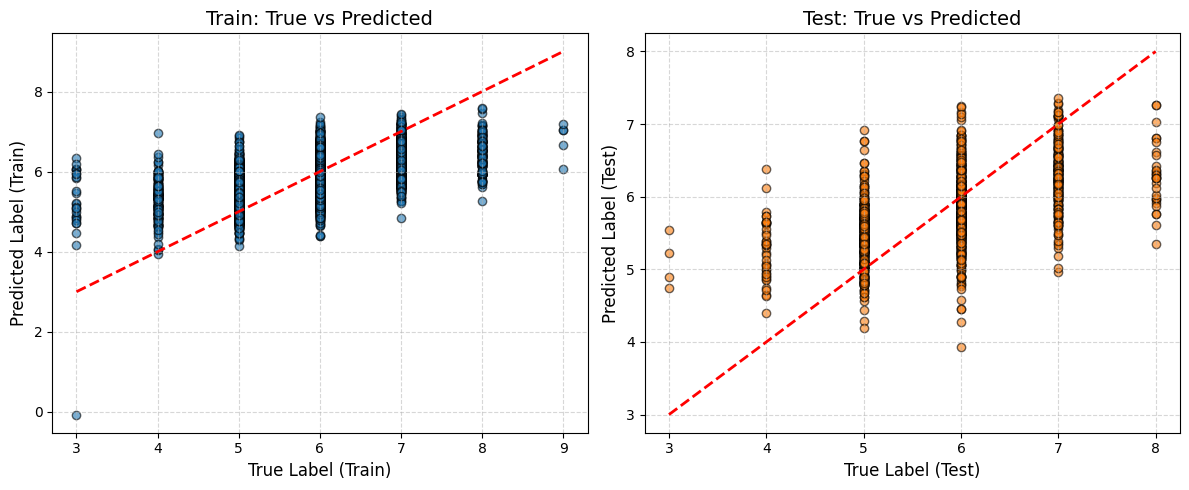

In [9]:
import matplotlib.pyplot as plt

# Predict on train and test data
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

plt.figure(figsize=(12, 5))

# Train plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='tab:blue', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('True Label (Train)', fontsize=12)
plt.ylabel('Predicted Label (Train)', fontsize=12)
plt.title('Train: True vs Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Test plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='tab:orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Label (Test)', fontsize=12)
plt.ylabel('Predicted Label (Test)', fontsize=12)
plt.title('Test: True vs Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [10]:
# evaluating the model
from machinegnostics.metrics import robr2, root_mean_squared_error, r2_score, hc

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Ensure targets are 1D arrays after splitting (do this once after train_test_split)
y_train = np.array(y_train).squeeze()
y_test = np.array(y_test).squeeze()

# Predict on train and test data
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

# Calculate metrics (no need for .ravel())
train_r2 = robr2(y_train, y_train_pred, w=rr.weights)
test_r2 = robr2(y_test, y_test_pred)
# Statistical r2
Statistical_train_r2 = r2_score(y_train, y_train_pred)
Statistical_test_r2 = r2_score(y_test, y_test_pred)

train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

# calculate hc
train_hc = hc(y_train, y_train_pred, case='i')
test_hc = hc(y_test, y_test_pred, case='i')

# sklearn r2
sklearn_train_r2 = r2_score(y_train, y_train_pred)
sklearn_test_r2 = r2_score(y_test, y_test_pred)


# accuracy
train_accuracy = accuracy_score(y_train, np.round(y_train_pred))
test_accuracy = accuracy_score(y_test, np.round(y_test_pred))

print(f"Train Robust R2: {train_r2:.4f}")
print(f"Test Robust R2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train Statistical R2: {Statistical_train_r2:.4f}")
print(f"Test Statistical R2: {Statistical_test_r2:.4f}")
print(f"Train H gnostic relevance: {train_hc:.4f}")
print(f"Test H gnostic relevance: {test_hc:.4f}")
print(f"Sklearn Train R2: {sklearn_train_r2:.4f}")
print(f"Sklearn Test R2: {sklearn_test_r2:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Robust R2: 0.7300
Test Robust R2: 0.3159
Train RMSE: 0.7018
Test RMSE: 0.6977
Train Statistical R2: 0.3651
Test Statistical R2: 0.3133
Train H gnostic relevance: 0.0521
Test H gnostic relevance: 0.0521
Sklearn Train R2: 0.3651
Sklearn Test R2: 0.3133
Train Accuracy: 0.5547
Test Accuracy: 0.5423
